# Machine Learning Assignment: Titanic Survival Prediction

## Objective
1. Loading and Exploring the Dataset
2. Data Preprocessing
3. Applying a Machine Learning Model
4. Evaluating Model Performance


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')


In [14]:
# Display the first few rows
print("Dataset Overview:")
display(titanic.head())


Dataset Overview:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,True


In [15]:
# Dataset exploration

# Shape of the dataset
print('Dataset shape:', titanic.shape)

# Summary information
print('\nDataset Info:')
titanic.info()

# Summary statistics
print('\nSummary Statistics:')
display(titanic.describe(include='all'))

Dataset shape: (891, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int32   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    int32   
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int32(2), int64(4), object(3)
memory usage: 72.5+ KB

Summary Statistics:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891,891,891,889,891,891
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Third,man,True,Southampton,no,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491,537,537,644,549,537
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


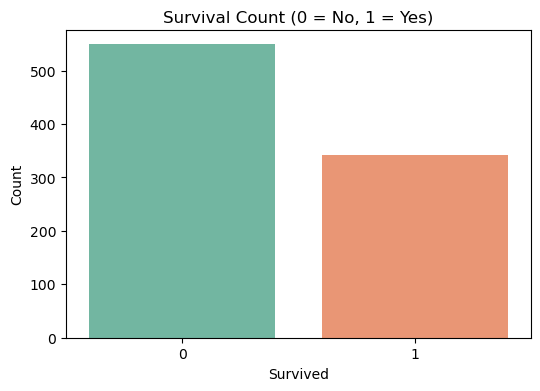

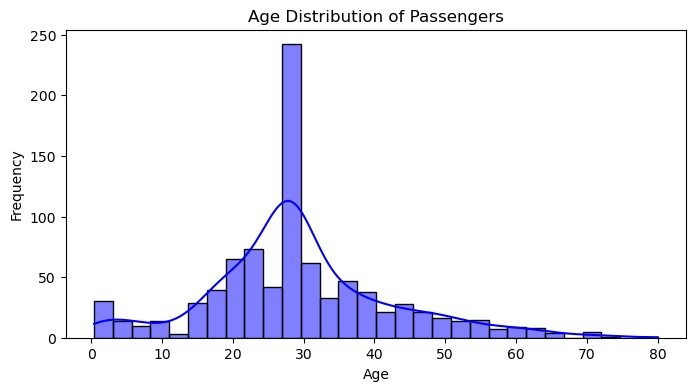

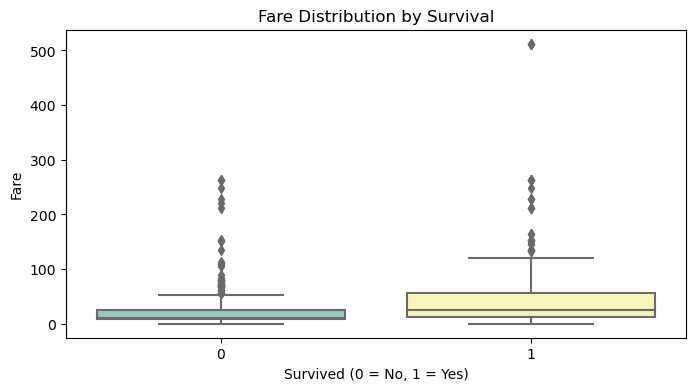

In [16]:
# Visualizing the dataset

# Count plot for survival
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic, palette='Set2')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Age distribution histogram
plt.figure(figsize=(8, 4))
sns.histplot(titanic['age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot for fare by survival
plt.figure(figsize=(8, 4))
sns.boxplot(x='survived', y='fare', data=titanic, palette='Set3')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

In [4]:
# Check for missing values
print("\nMissing Values:")
print(titanic.isnull().sum())



Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
# Fill missing values
# - Fill 'age' with median
# - Fill 'embarked' with mode
# - Drop 'deck' due to too many missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic.drop(columns=['deck'], inplace=True)


In [6]:
# Encode categorical variables
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])
titanic['embarked'] = le.fit_transform(titanic['embarked'])


In [7]:
# Select relevant features and target
features = ['pclass', 'sex', 'age', 'fare', 'embarked']
X = titanic[features]
y = titanic['survived'].dropna()


In [8]:
# Normalize numerical features
scaler = StandardScaler()
X[['age', 'fare']] = scaler.fit_transform(X[['age', 'fare']])


C:\Users\raman\AppData\Local\Temp\ipykernel_6316\2192598106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age', 'fare']] = scaler.fit_transform(X[['age', 'fare']])


In [9]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Make predictions
y_pred = model.predict(X_test)


In [12]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))



Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
 [[87 18]
 [19 55]]


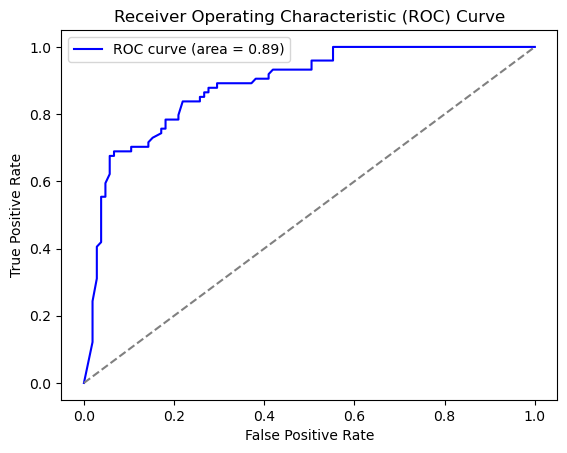

In [13]:
# Plot ROC Curve
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()